In [153]:
import pandas as pd
import numpy as np
import panel as pn
pn.extension("tabulator")

import hvplot.pandas
import matplotlib.pyplot as plt
from statistics import mean
import seaborn as sns

In [154]:
df = pd.read_csv("survey.csv")

In [155]:
# print(df.head())

## (0) Data Cleaning

In [156]:
# Drop BPM column and all NaN values
df.drop(columns=["BPM"], inplace=True)
df = df.dropna()
# DF now includes a total of 718 rows

In [157]:
# Change Age, Anxiety, Depression, Insomnia, and OCD columns to int from float
df["Age"] = df["Age"].astype("int")
df["Anxiety"] = df["Anxiety"].astype("int")
df["Depression"] = df["Depression"].astype("int")
df["Insomnia"] = df["Insomnia"].astype("int")
df["OCD"] = df["OCD"].astype("int")

In [158]:
# Create Mental Health Dataframe
mh_df = df[["Anxiety", "Depression", "Insomnia", "OCD"]].copy()

In [159]:
# Create Total Health Score Column
df["Total Health Score"] = df["Anxiety"] + df["Depression"] + df["Insomnia"] + df["OCD"]

In [160]:
# Make DataFrame Pipeline Interactive
idf = df.interactive()

In [161]:
# Make MH Ratings Numerical
# df2=df.replace(to_replace="Never",value=0)
# df3=df2.replace(to_replace="Rarely",value=1)
# df4=df3.replace(to_replace="Sometimes",value=2)
# df5=df4.replace(to_replace="Very frequently",value=3)
# print(df5.head())

## (1) Understanding the Audience

Text(0, 0.5, 'Distribution')

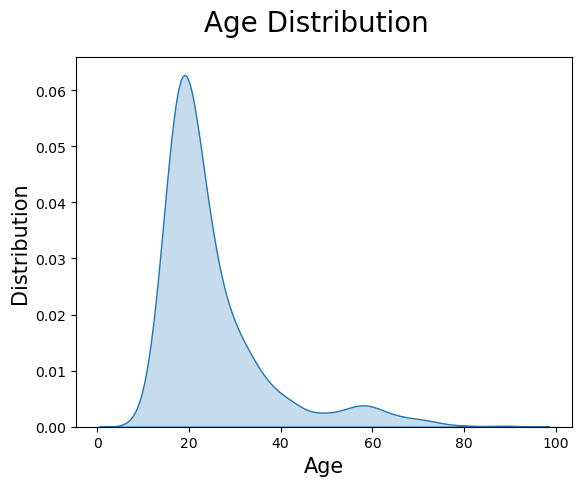

In [162]:
# Age Distribution
fig = sns.kdeplot(df["Age"], shade=True)
fig.figure.suptitle("Age Distribution", fontsize = 20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Distribution', fontsize=15)

Text(0, 0.5, 'Distribution')

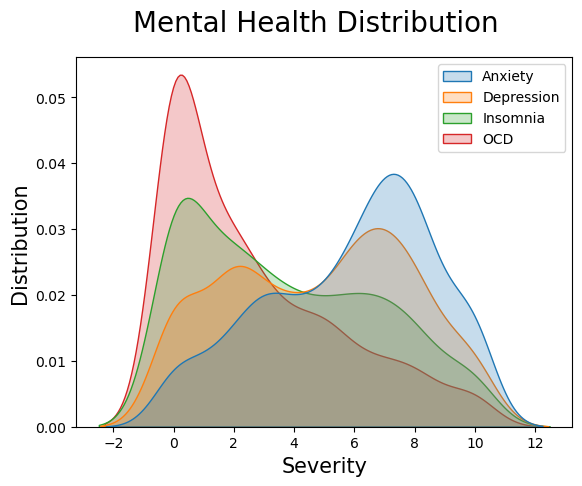

In [163]:
# Mental Health Distribution
fig = sns.kdeplot(data=mh_df, shade=True)
fig.figure.suptitle("Mental Health Distribution", fontsize = 20)
plt.xlabel('Severity', fontsize=15)
plt.ylabel('Distribution', fontsize=15)

Text(0, 0.5, 'Distribution')

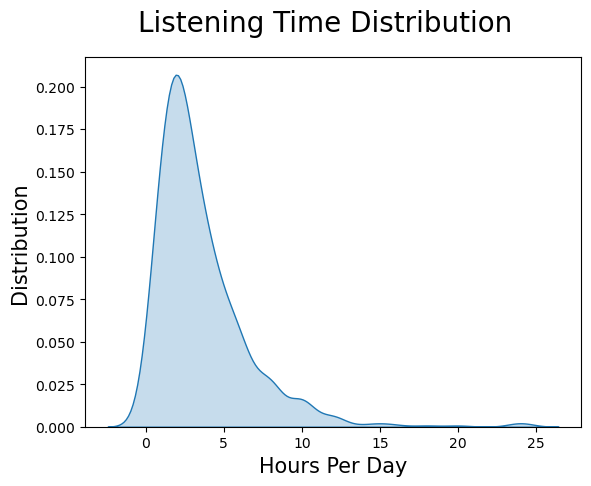

In [164]:
# Hours Per Day Distribution
fig= sns.kdeplot(df["Hours per day"], shade=True)
fig.figure.suptitle("Listening Time Distribution", fontsize = 20)
plt.xlabel('Hours Per Day', fontsize=15)
plt.ylabel('Distribution', fontsize=15)

Text(0, 0.5, 'Distribution')

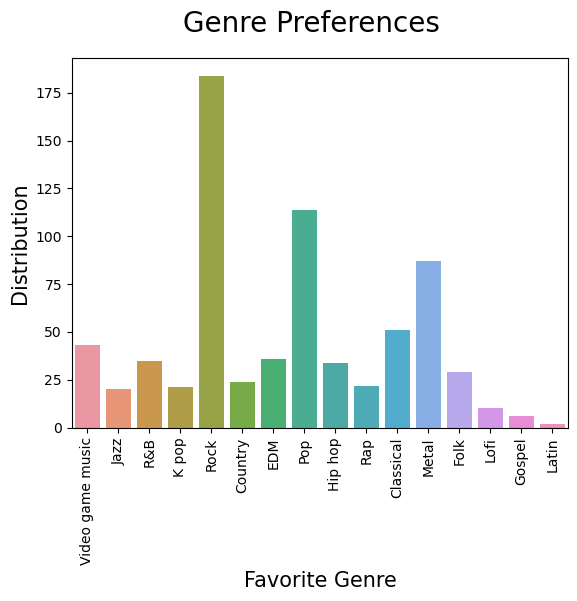

In [165]:
# Genre Breakdown by Count
fig = sns.countplot(x=df['Fav genre'])
plt.xticks(rotation=90)
fig.figure.suptitle("Genre Preferences", fontsize = 20)
plt.xlabel('Favorite Genre', fontsize=15)
plt.ylabel('Distribution', fontsize=15)

Text(0, 0.5, 'Age')

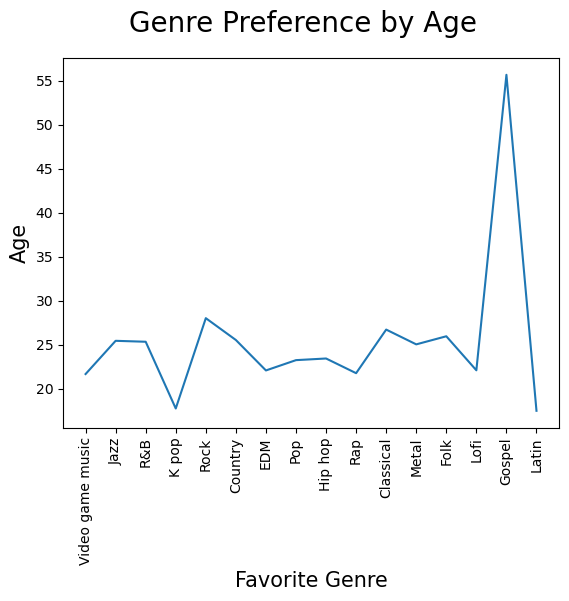

In [166]:
# Genre Breakdown by Age
fig = sns.lineplot(x=df['Fav genre'], y=df['Age'], ci=None)
plt.xticks(rotation=90)
fig.figure.suptitle("Genre Preference by Age", fontsize = 20)
plt.xlabel('Favorite Genre', fontsize=15)
plt.ylabel('Age', fontsize=15)

## (2) Data Analysis

Text(0, 0.5, 'Count')

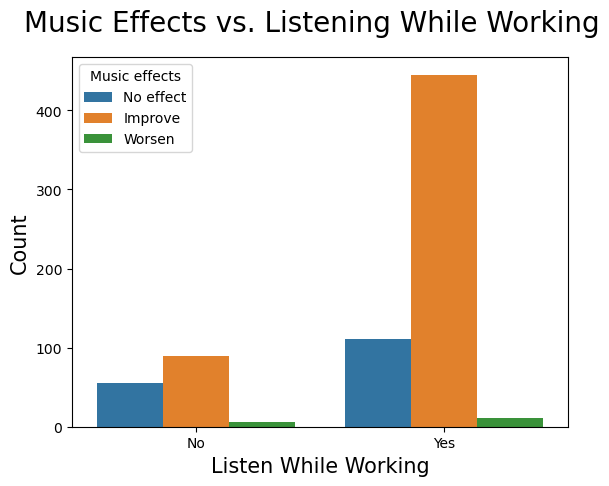

In [167]:
# Music Effects vs. Listening to Music While Working
fig = sns.countplot(x=df['While working'], hue=df["Music effects"])
fig.figure.suptitle("Music Effects vs. Listening While Working", fontsize = 20)
plt.xlabel('Listen While Working', fontsize=15)
plt.ylabel('Count', fontsize=15)

Text(0, 0.5, 'Count')

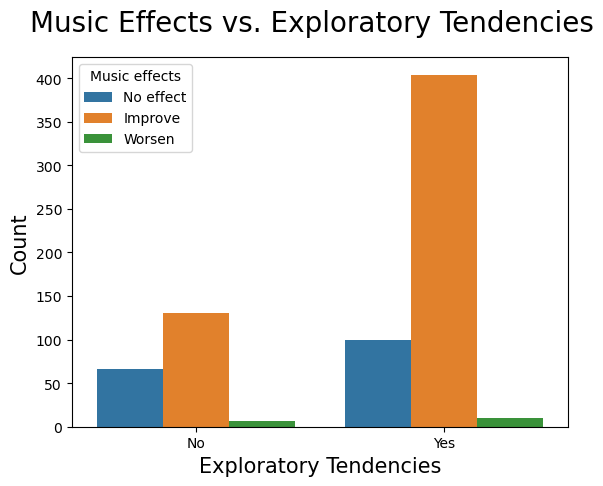

In [168]:
# Music Effects vs. Exploratory Tendencies
fig = sns.countplot(x=df['Exploratory'], hue=df["Music effects"])
fig.figure.suptitle("Music Effects vs. Exploratory Tendencies", fontsize = 20)
plt.xlabel('Exploratory Tendencies', fontsize=15)
plt.ylabel('Count', fontsize=15)

Text(0, 0.5, 'Count')

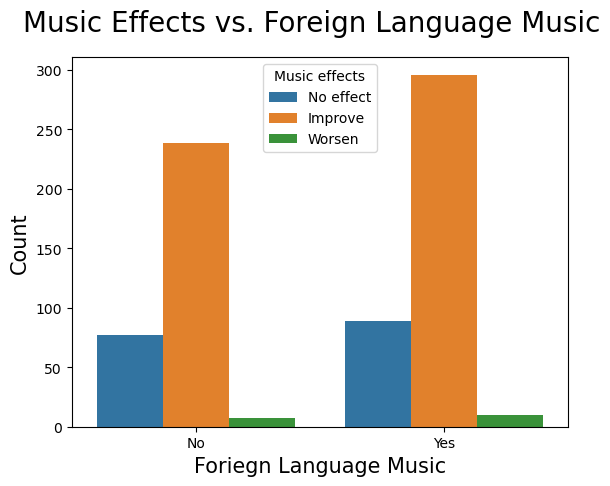

In [169]:
# Music Effects vs. Foreign Language Music
fig = sns.countplot(x=df['Foreign languages'], hue=df["Music effects"], order=("No", "Yes"))
fig.figure.suptitle("Music Effects vs. Foreign Language Music", fontsize = 20)
plt.xlabel('Foriegn Language Music', fontsize=15)
plt.ylabel('Count', fontsize=15)

# Instrumentalists and Mental Health

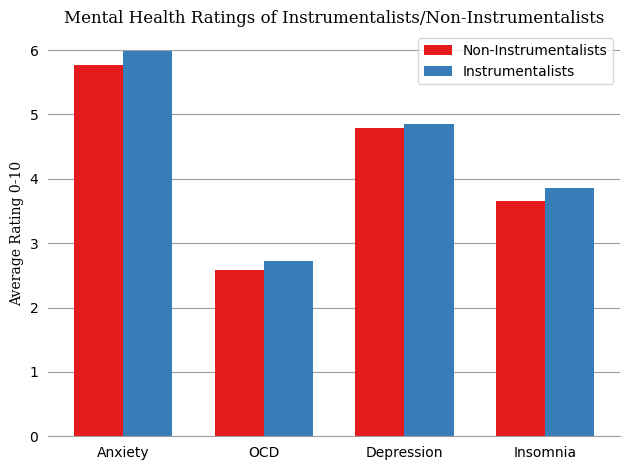

In [170]:
#Groupings of data of Instrumentalists vs non-instrumentalists
df_no = df[df['Instrumentalist'] == 'No'] 
df_yes = df[df['Instrumentalist'] == 'Yes'] 

#anxiety data
non_instrumentalist_anxiety = df_no["Anxiety"].tolist()
instrumentalist_anxiety = df_yes["Anxiety"].tolist()
mean_non_instrumentalist_anxiety = mean(non_instrumentalist_anxiety)
mean_instrumentalist_anxiety = mean(instrumentalist_anxiety)

#OCD data
non_instrumentalist_OCD = df_no["OCD"].tolist()
instrumentalist_OCD = df_yes["OCD"].tolist()
mean_non_instrumentalist_OCD = mean(non_instrumentalist_OCD)
mean_instrumentalist_OCD = mean(instrumentalist_OCD)

#depression data
non_instrumentalist_depression = df_no["Depression"].tolist()
instrumentalist_depression = df_yes["Depression"].tolist()
mean_non_instrumentalist_depression = mean(non_instrumentalist_depression)
mean_instrumentalist_depression = mean(instrumentalist_depression)

#Insomnia data
non_instrumentalist_insomnia = df_no["Insomnia"].tolist()
instrumentalist_insomnia = df_yes["Insomnia"].tolist()
mean_non_instrumentalist_insomnia = mean(non_instrumentalist_insomnia)
mean_instrumentalist_insomnia = mean(instrumentalist_insomnia)

sfont = {"fontname": "serif"}
labels = ["Anxiety", "OCD", "Depression", "Insomnia"]
yes_means = [mean_instrumentalist_anxiety, mean_instrumentalist_OCD, mean_instrumentalist_depression, mean_instrumentalist_insomnia]
no_means = [mean_non_instrumentalist_anxiety, mean_non_instrumentalist_OCD, mean_non_instrumentalist_depression, mean_non_instrumentalist_insomnia]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, no_means, width, label='Non-Instrumentalists', color="#e41a1c")  # color blind friendly red
rects2 = ax.bar(x + width/2, yes_means, width, label='Instrumentalists', color="#377eb8")  # color blind friendly blue

ax.set_ylabel('Average Rating 0-10', **sfont)
ax.set_title('Mental Health Ratings of Instrumentalists/Non-Instrumentalists', **sfont)
ax.set_xticks(x, labels)
ax.legend()

# spines are the top, bottom, left, right lines
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_color("#A59E9D")
ax.tick_params(bottom=False, left=False)  # gets rid on ticks on x and y axes
ax.set_axisbelow(True)  # puts axis lines below bars
ax.yaxis.grid(True, color="#A59E9D")  # adds y axis lines

fig.tight_layout()

plt.show()


# Composers vs Mental Health 

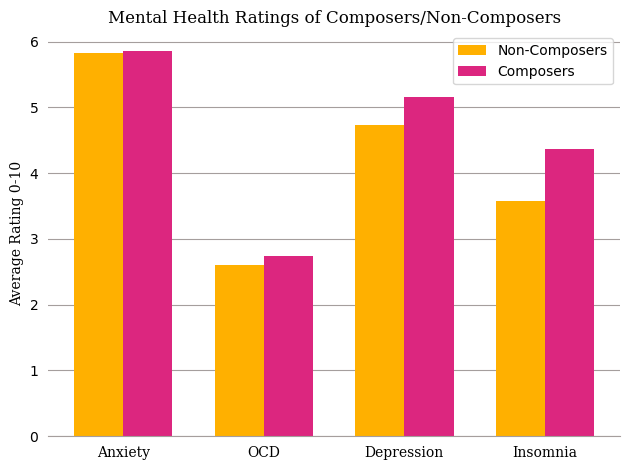

In [171]:
#Groupings of data of Composers vs non-composers
df_no = df[df['Composer'] == 'No'] 
df_yes = df[df['Composer'] == 'Yes'] 

#anxiety data
non_composer_anxiety = df_no["Anxiety"].tolist()
composer_anxiety = df_yes["Anxiety"].tolist()
mean_non_composer_anxiety = mean(non_composer_anxiety)
mean_composer_anxiety = mean(composer_anxiety)

#OCD data
non_composer_OCD = df_no["OCD"].tolist()
composer_OCD = df_yes["OCD"].tolist()
mean_non_composer_OCD = mean(non_composer_OCD)
mean_composer_OCD = mean(composer_OCD)

#depression data
non_composer_depression = df_no["Depression"].tolist()
composer_depression = df_yes["Depression"].tolist()
mean_non_composer_depression = mean(non_composer_depression)
mean_composer_depression = mean(composer_depression)

#Insomnia data
non_composer_insomnia = df_no["Insomnia"].tolist()
composer_insomnia = df_yes["Insomnia"].tolist()
mean_non_composer_insomnia = mean(non_composer_insomnia)
mean_composer_insomnia = mean(composer_insomnia)

sfont = {"fontname": "serif"}
labels = ["Anxiety", "OCD", "Depression", "Insomnia"]
yes_means = [mean_composer_anxiety, mean_composer_OCD, mean_composer_depression, mean_composer_insomnia]
no_means = [mean_non_composer_anxiety, mean_non_composer_OCD, mean_non_composer_depression, mean_non_composer_insomnia]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, no_means, width, label='Non-Composers', color="#FFB000")  # color blind friendly yellow
rects2 = ax.bar(x + width/2, yes_means, width, label='Composers', color="#DC267F")  # color blind friendly fuschia

ax.set_ylabel('Average Rating 0-10', **sfont)
ax.set_title('Mental Health Ratings of Composers/Non-Composers', **sfont)
ax.set_xticks(x, labels, **sfont)
ax.legend()


# spines are the top, bottom, left, right lines
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_color("#A59E9D")
ax.tick_params(bottom=False, left=False)  # gets rid on ticks on x and y axes
ax.set_axisbelow(True)  # puts axis lines below bars
ax.yaxis.grid(True, color="#A59E9D")  # adds y axis lines

fig.tight_layout()

plt.show()

# Mental Health and Listening to Music at Work

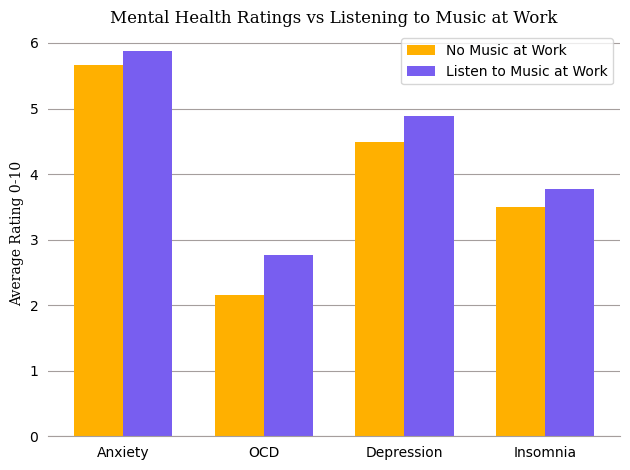

In [172]:
#Groupings of data of Instrumentalists vs non-instrumentalists
df_no = df[df['While working'] == 'No']
df_yes = df[df['While working'] == 'Yes'] 

#anxiety data
no_work_anxiety = df_no["Anxiety"].tolist()
yes_work_anxiety = df_yes["Anxiety"].tolist()
mean_no_work_anxiety = mean(no_work_anxiety)
mean_yes_work_anxiety = mean(yes_work_anxiety)

#OCD data
no_work_OCD = df_no["OCD"].tolist()
yes_work_OCD = df_yes["OCD"].tolist()
mean_no_work_OCD = mean(no_work_OCD)
mean_yes_work_OCD = mean(yes_work_OCD)

#depression data
no_work_depression = df_no["Depression"].tolist()
yes_work_depression = df_yes["Depression"].tolist()
mean_no_work_depression = mean(no_work_depression)
mean_yes_work_depression = mean(yes_work_depression)

#Insomnia data
no_work_insomnia = df_no["Insomnia"].tolist()
yes_work_insomnia = df_yes["Insomnia"].tolist()
mean_no_work_insomnia = mean(no_work_insomnia)
mean_yes_work_insomnia = mean(yes_work_insomnia)

sfont = {"fontname": "serif"}
labels = ["Anxiety", "OCD", "Depression", "Insomnia"]
yes_means = [mean_yes_work_anxiety, mean_yes_work_OCD, mean_yes_work_depression, mean_yes_work_insomnia]
no_means = [mean_no_work_anxiety, mean_no_work_OCD, mean_no_work_depression, mean_no_work_insomnia]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, no_means, width, label='No Music at Work', color="#FFB000")  # color blind friendly yellow
rects2 = ax.bar(x + width/2, yes_means, width, label='Listen to Music at Work', color="#785EF0")  # color blind friendly purple

ax.set_ylabel('Average Rating 0-10', **sfont)
ax.set_title('Mental Health Ratings vs Listening to Music at Work', **sfont)
ax.set_xticks(x, labels)
ax.legend()

# spines are the top, bottom, left, right lines
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_color("#A59E9D")
ax.tick_params(bottom=False, left=False)  # gets rid on ticks on x and y axes
ax.set_axisbelow(True)  # puts axis lines below bars
ax.yaxis.grid(True, color="#A59E9D")  # adds y axis lines

fig.tight_layout()

plt.show()